# Assignment


In [11]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline

In [13]:
# Loading the dataset
df = pd.read_csv('supermarket_sales.csv')

In [14]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


# Question 

As always, do your EDA, find me insights. I want a good section going over this, what you find me, i don't know. At the end, your mention some actionable items for a business, that it can do to perform better. 

![](https://media.giphy.com/media/ukwPlCmJ5RmlqvQCpA/giphy.gif)


### Modeling
- Fit a Simple Linear Regression Model, that tries to predict the ```Rating``` column with the help of the ```Total``` Column. We only have to use these 2 columns, nothing more. 
    - What was the training accuracy.
    - What was the testing accuracy.
    

---


- Make a python function, that takes ```Total``` as an input, and predicts what the ```Rating``` will be using your newly trained model to assist you !! 
- Just to be clear, your function will take 1 float value as an input and return back a float value as an output. 


![](https://media.tenor.com/r3XdvPsAV3kAAAAC/despicable-me-minions.gif)

# Exploratory Data Analysis (EDA)
![](https://cdn.dribbble.com/users/1523313/screenshots/13671653/media/7c52f9d4b1117aa12f3bf9f9c3b9e1aa.gif)

In [15]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [16]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Insight 1 - Finding the most profitable branch
![](https://th.bing.com/th/id/R.d548f99984d3b06f710073cff4692e67?rik=FQ5t4XgUmfXEDA&pid=ImgRaw&r=0)

In [17]:
df.groupby('Branch')['gross income'].mean()

Branch
A    14.874001
B    15.232024
C    16.052367
Name: gross income, dtype: float64

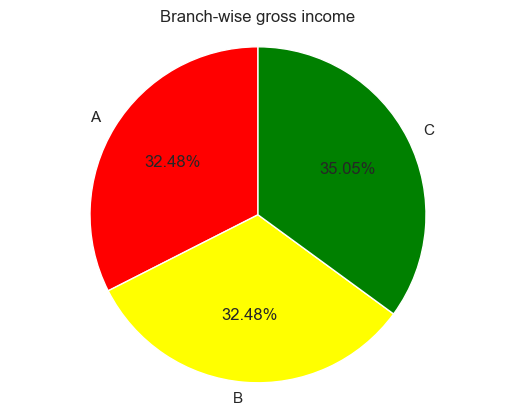

In [28]:
labels= ['A', 'B', 'C']

colors=['red', 'yellow', 'green']

sizes= [14.874001, 14.874001, 16.052367]

plt.pie(sizes,labels=labels, colors=colors, startangle=90,autopct='%1.2f%%')

plt.axis('equal')

plt.title('Branch-wise gross income')

plt.show()

We can conclude that the maximum gross income that we are receiving is from Branch C, i.e 35.05%. We can also see that we are receiving an equal percentage of gross income from Branch A and B, i.e 32.48%.

# Insight 2 - Finding relationship between Rating and Gross income
![](https://media0.giphy.com/media/xT5LMtNbxWaczSsZwI/200.gif?cid=790b7611h1b8mxbhg8f5p2wtk4aocvljiz2lc10e4hp3ifcz&rid=200.gif&ct=g)

Text(0.5, 1.0, 'Rating vs Gross income')

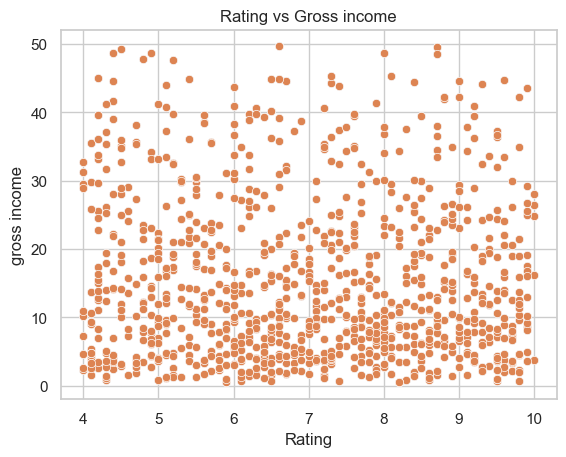

In [27]:
df1 = sns.scatterplot(x = df['Rating'], y= df['gross income'])
sns.scatterplot(x="Rating", y="gross income", data=df)
df1.set_title("Rating vs Gross income")

From this plot, we can conclude that there is no correlation between the gross income and rating of the customer. This means that these two variables are independent of each other.

# Insight 3 - Finding correlation between different variables using heatmap
![](https://th.bing.com/th/id/R.c4bae80ba4740b2350d5c67200f8ed99?rik=gPhXkQB5BkSfDg&pid=ImgRaw&r=0)

                         Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 

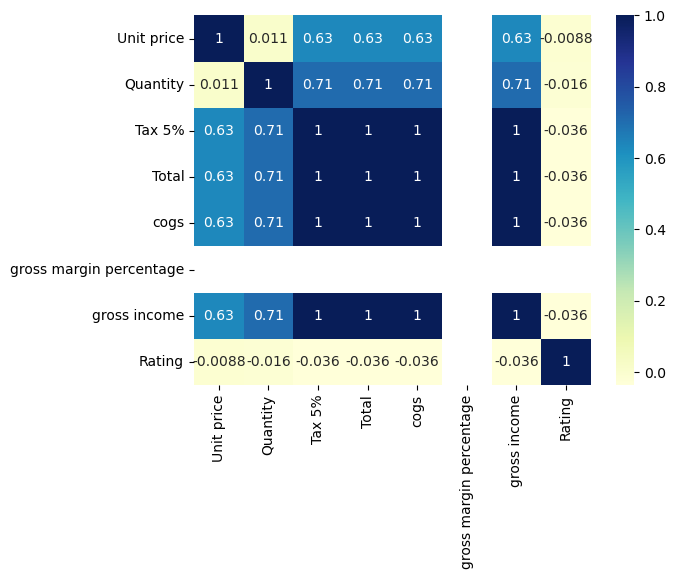

In [24]:
print(df.corr())

# Plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

From the above heatmap, we can conclude that there is a positive correlation between the following:
1. Tax and Total
2. Tax and cogs
3. Tax and gross income
4. Total and cogs
5. Total and gross income
6. Cogs and gross income

This means that the two variables have a strong linear relationship.

# Insight 4 - Total price distribution segregated by customer type
![](https://th.bing.com/th/id/OIP.uEYSlt4BJwUggtccYh21ZwHaFj?pid=ImgDet&rs=1)

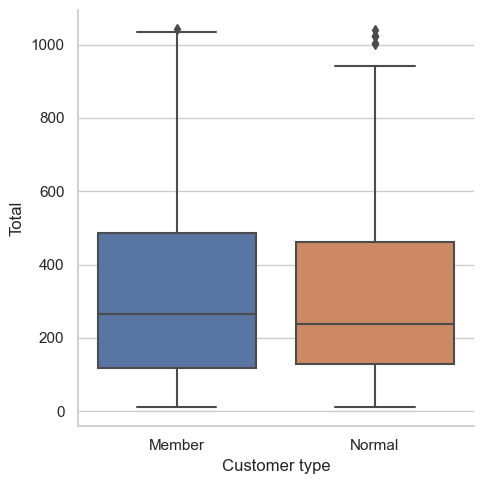

In [26]:
sns.catplot(data=df, x="Customer type", y="Total", kind="box")

We can conclude that the range of Total price is wider in case of Member customers as compared to Normal customers. 
The median price of Member customers is more than the Normal Customers. 
Also, we have 3 outliers in the Total Price for the Normal Customer type.

# Insight 5 - Distribution of Rating
![](https://th.bing.com/th/id/OIP.Rz2c9E3iZXhDutEwCa8PigHaC4?pid=ImgDet&rs=1)

C:\Users\aditi\AppData\Local\Temp\ipykernel_18416\1281759488.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'])


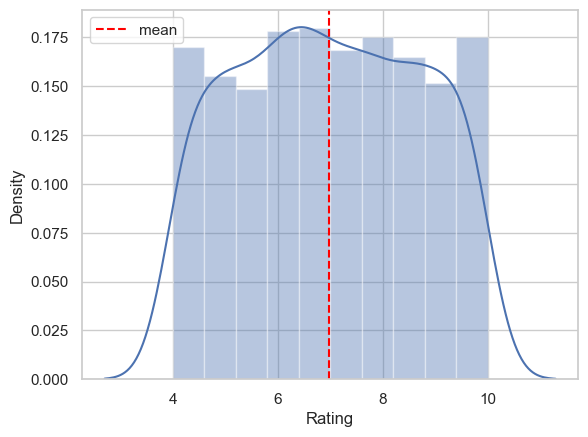

In [216]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.legend()

The above plot displays that the distribution of Rating is normally distributed and there is no skewness on the right or left side of the distribution. This signifies that the data is symmetrical.
The red line displays the mean of the distribution, i.e average rating of the customer is equal to 7.

# Insight 6 - Product line generating the most income
![](https://th.bing.com/th/id/R.38ccc9d41f84f9d5ded209199b6c9682?rik=uuSqaqhjEIJQYQ&pid=ImgRaw&r=0)

<Axes: xlabel='Product line', ylabel='gross income'>

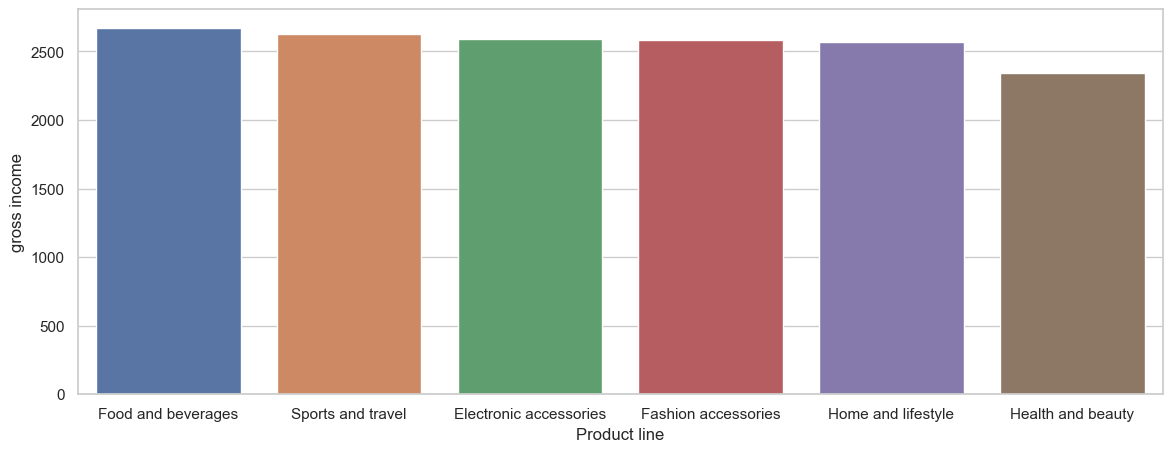

In [45]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(14,5))
sns.barplot(x='Product line', y='gross income', data=cat)

From the above plot, we can conclude that the food and beverages segment is generating the highest sales revenue. On the contrary, the Health and Beauty segment is generating the least sales revenue.

# Insight 7 - Busiest hour of the day

![](https://th.bing.com/th/id/R.13145c2cac6a7aebef1c0b190450861d?rik=U4jyTVpRJL%2fv5w&pid=ImgRaw&r=0)

In [49]:
# Extracting the hour from the date variable
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

Text(0.5, 1.0, 'Product Sales per Hour')

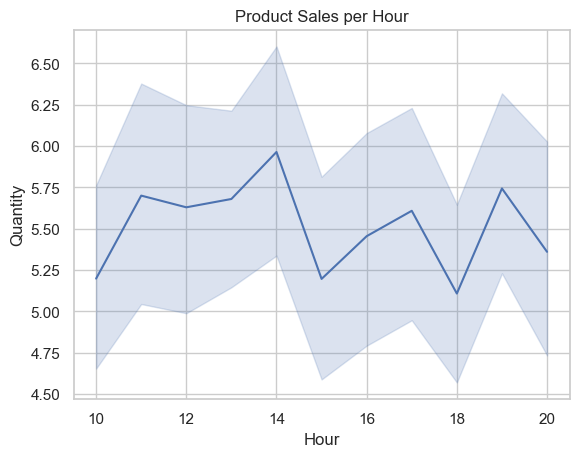

In [51]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

From this plot, we can see that Peak is observed in the 14th hour i.e 2 pm of the day. Hence, sales are typically higher in the afternoons.

# Actionable items for the business so that it can perform better

![](https://th.bing.com/th/id/R.aefd42c55da832656debd5182b15e489?rik=WVe5%2ffMEhRzAHQ&pid=ImgRaw&r=0)

([<matplotlib.axis.XTick at 0x1f5742e34c0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

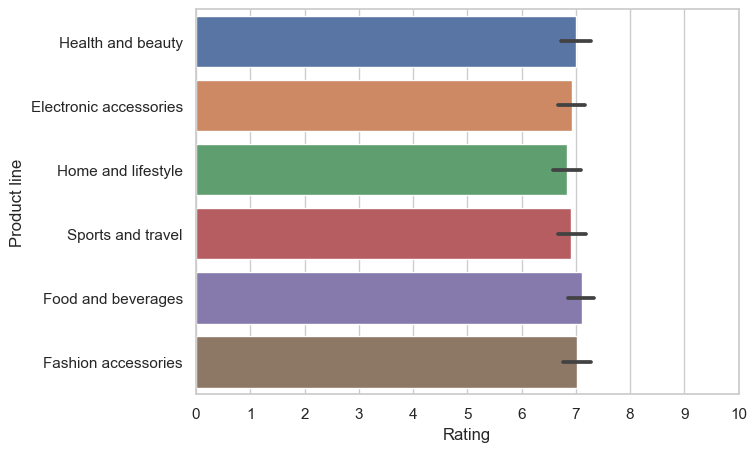

In [57]:
# Rating as per the product lines

xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (7,5))
sns.barplot(y = df['Product line'], x = df['Rating'])
plt.xticks(xdata)

<Axes: xlabel='Quantity', ylabel='Product line'>

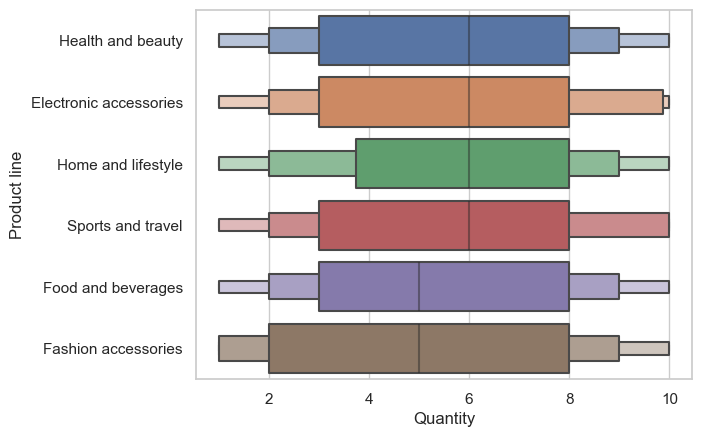

In [59]:
# Quantity purchased for the product lines

sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

We can conclude that though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but quantity purchased is low. Hence, supply for these products need to be increased.

# ---------------------------------------------------------------------------------------------------------------

# Modelling
![](https://th.bing.com/th/id/R.2a73bc6db937009635d32372cec2c5ab?rik=jNTW5MG8m18oyQ&pid=ImgRaw&r=0)

In [315]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [316]:
# Looking at statistcs
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [317]:
# Let's look at our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [320]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

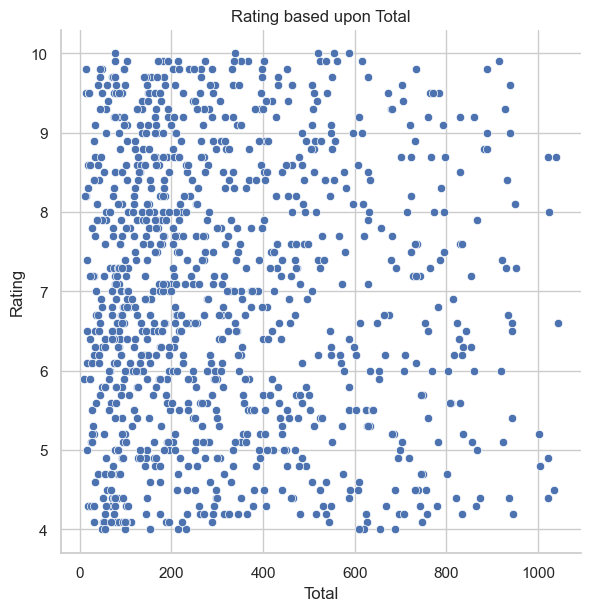

In [323]:
# PLotting a scatter plot
sns.pairplot(df,x_vars=['Total'],y_vars=['Rating'],height=6,kind='scatter')

plt.xlabel('Total')
plt.ylabel('Rating')
plt.title('Rating based upon Total')
plt.show()

# Simple linear regression

In [399]:
x = df['Total']
y = df['Rating']

In [400]:
x

0       548.9715
1        80.2200
2       340.5255
3       489.0480
4       634.3785
         ...    
995      42.3675
996    1022.4900
997      33.4320
998      69.1110
999     649.2990
Name: Total, Length: 1000, dtype: float64

In [401]:
y

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
995    6.2
996    4.4
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 1000, dtype: float64

In [402]:
# Import train-test scikit learn
from sklearn.model_selection import train_test_split

In [403]:
# Spliting the data for train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.5,random_state=100)

In [404]:
x_train.shape

(500,)

In [405]:
x_train.values.reshape(-1,1).shape

(500, 1)

In [406]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

# Fitting the model

In [407]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [408]:
# Fitting the model
lr = LinearRegression()

In [409]:
lr.fit(x_train,y_train)

LinearRegression()

In [410]:
lr.predict([[1000.0]])

array([6.64716606])

# Predicting training data
![](https://th.bing.com/th/id/OIP.abYNz4jQp0acT7rUtDCLuAF1Cn?pid=ImgDet&rs=1)

In [411]:
y_pred_training = lr.predict(x_train)

In [412]:
x_train

array([[ 184.107 ],
       [  86.247 ],
       [ 165.9   ],
       [ 922.635 ],
       [ 627.6165],
       [ 354.0075],
       [ 167.034 ],
       [ 209.622 ],
       [ 343.056 ],
       [ 374.7975],
       [ 471.03  ],
       [ 299.3655],
       [ 165.4485],
       [  18.6375],
       [ 640.038 ],
       [ 200.214 ],
       [ 887.922 ],
       [  16.275 ],
       [  68.2395],
       [ 493.794 ],
       [  76.356 ],
       [ 235.746 ],
       [ 256.7775],
       [ 575.316 ],
       [ 433.692 ],
       [ 510.9615],
       [ 163.233 ],
       [ 131.208 ],
       [ 193.074 ],
       [ 271.278 ],
       [ 657.531 ],
       [ 248.409 ],
       [ 203.112 ],
       [ 742.812 ],
       [  98.028 ],
       [ 290.0835],
       [ 189.0945],
       [ 836.304 ],
       [ 185.094 ],
       [  80.22  ],
       [ 198.996 ],
       [ 210.966 ],
       [ 520.4115],
       [ 671.79  ],
       [  26.25  ],
       [ 195.174 ],
       [  22.386 ],
       [1034.46  ],
       [ 756.168 ],
       [ 663.2955],


In [414]:
y_pred_training

array([6.92319073, 6.95629773, 6.92935033, 6.6733394 , 6.77314708,
       6.86571171, 6.92896669, 6.91455875, 6.86941671, 6.85867825,
       6.82612184, 6.88419764, 6.92950308, 6.97917069, 6.76894476,
       6.91774157, 6.68508315, 6.97996995, 6.96238985, 6.81842055,
       6.95964396, 6.90572074, 6.89860558, 6.79084085, 6.83875365,
       6.81261262, 6.93025261, 6.94108698, 6.9201571 , 6.89369992,
       6.76302671, 6.90143672, 6.91676115, 6.7341753 , 6.9523121 ,
       6.88733783, 6.92150341, 6.70254603, 6.92285681, 6.95833673,
       6.91815363, 6.91410406, 6.80941559, 6.75820275, 6.97659531,
       6.91944665, 6.97790254, 6.6355079 , 6.72965684, 6.76107652,
       6.91563864, 6.73793714, 6.80151893, 6.83226724, 6.86047213,
       6.93082097, 6.9455344 , 6.78689785, 6.85881678, 6.91032446,
       6.9440247 , 6.93469648, 6.95956936, 6.83265799, 6.95059281,
       6.92626698, 6.92077519, 6.87939144, 6.96879456, 6.95036547,
       6.69684822, 6.90337625, 6.88553684, 6.8577369 , 6.96169

In [415]:
y_train

27     7.7
767    6.3
958    7.8
96     5.1
5      4.1
      ... 
855    4.2
871    9.6
835    5.8
792    4.9
520    7.7
Name: Rating, Length: 500, dtype: float64

# Predicting testing data
![](https://th.bing.com/th/id/OIP.9mMMNpuIcySfGsZ4HbCFkgHaEY?pid=ImgDet&rs=1)

In [416]:
y_pred_testing = lr.predict(x_test)

In [417]:
x_test

array([[ 536.991 ],
       [ 255.15  ],
       [ 102.837 ],
       [  17.094 ],
       [ 208.425 ],
       [ 474.348 ],
       [ 212.688 ],
       [ 139.923 ],
       [ 921.186 ],
       [ 270.018 ],
       [ 314.055 ],
       [ 631.1445],
       [ 316.47  ],
       [ 231.2415],
       [ 732.27  ],
       [ 406.875 ],
       [ 208.089 ],
       [ 611.079 ],
       [ 208.677 ],
       [  12.6945],
       [ 477.1305],
       [ 130.0425],
       [ 629.496 ],
       [  32.277 ],
       [ 115.185 ],
       [ 165.123 ],
       [ 101.64  ],
       [ 119.259 ],
       [ 356.328 ],
       [ 397.992 ],
       [ 222.012 ],
       [ 465.444 ],
       [  26.5545],
       [ 148.974 ],
       [  74.7075],
       [ 616.98  ],
       [ 143.22  ],
       [  37.611 ],
       [ 418.95  ],
       [ 233.226 ],
       [ 420.2625],
       [ 484.5225],
       [ 456.288 ],
       [ 734.076 ],
       [ 153.048 ],
       [ 532.728 ],
       [  85.743 ],
       [ 115.08  ],
       [ 102.396 ],
       [ 554.148 ],


In [418]:
y_pred_testing

array([6.80380658, 6.89915618, 6.95068517, 6.97969288, 6.91496371,
       6.82499933, 6.91352149, 6.93813861, 6.67382961, 6.89412619,
       6.87922803, 6.77195352, 6.87841102, 6.90724466, 6.73774176,
       6.84782611, 6.91507738, 6.77874188, 6.91487845, 6.98118127,
       6.82405798, 6.94148128, 6.77251123, 6.97455632, 6.94650772,
       6.9296132 , 6.95109013, 6.94512945, 6.86492666, 6.85083132,
       6.91036709, 6.82801164, 6.97649229, 6.93507657, 6.96020166,
       6.77674551, 6.9370232 , 6.97275177, 6.84374102, 6.90657328,
       6.84329699, 6.82155719, 6.8311092 , 6.73713078, 6.93369829,
       6.8052488 , 6.95646824, 6.94654324, 6.95083437, 6.7980022 ,
       6.87274872, 6.75475706, 6.84767692, 6.81511696, 6.96449989,
       6.70498998, 6.7028906 , 6.95680215, 6.97182819, 6.71871589,
       6.86669568, 6.94547046, 6.85050451, 6.89102507, 6.79061706,
       6.98050989, 6.88244638, 6.89617228, 6.77099086, 6.97585999,
       6.89668381, 6.96719249, 6.85088105, 6.92437007, 6.86652

In [419]:
y_test

249    4.2
353    4.8
537    6.9
424    5.0
564    9.0
      ... 
825    6.6
426    8.9
532    8.2
991    6.0
481    6.2
Name: Rating, Length: 500, dtype: float64

# Plotting the predictions

In [420]:
len(y_test)

500

In [421]:
y_test

249    4.2
353    4.8
537    6.9
424    5.0
564    9.0
      ... 
825    6.6
426    8.9
532    8.2
991    6.0
481    6.2
Name: Rating, Length: 500, dtype: float64

In [422]:
x_range = [i for i in range(len(y_test))]

In [423]:
x_range

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [425]:
y_test.shape

(500,)

# Testing data

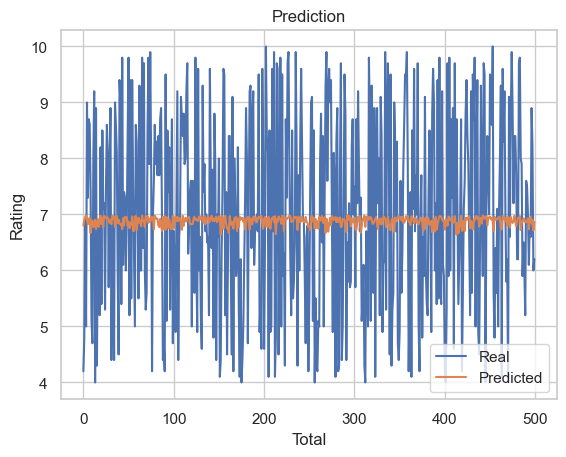

In [426]:
plt.xlabel('Total')
plt.ylabel('Rating')
plt.title('Prediction')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred_testing)

# Function add a legend  
plt.legend(["Real", "Predicted"])

# Training data

In [427]:
len(y_train)

500

In [428]:
y_train

27     7.7
767    6.3
958    7.8
96     5.1
5      4.1
      ... 
855    4.2
871    9.6
835    5.8
792    4.9
520    7.7
Name: Rating, Length: 500, dtype: float64

In [429]:
x_range = [i for i in range(len(y_train))]

In [430]:
x_range

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [431]:
y_train.shape

(500,)

In [432]:
y_pred_training

array([6.92319073, 6.95629773, 6.92935033, 6.6733394 , 6.77314708,
       6.86571171, 6.92896669, 6.91455875, 6.86941671, 6.85867825,
       6.82612184, 6.88419764, 6.92950308, 6.97917069, 6.76894476,
       6.91774157, 6.68508315, 6.97996995, 6.96238985, 6.81842055,
       6.95964396, 6.90572074, 6.89860558, 6.79084085, 6.83875365,
       6.81261262, 6.93025261, 6.94108698, 6.9201571 , 6.89369992,
       6.76302671, 6.90143672, 6.91676115, 6.7341753 , 6.9523121 ,
       6.88733783, 6.92150341, 6.70254603, 6.92285681, 6.95833673,
       6.91815363, 6.91410406, 6.80941559, 6.75820275, 6.97659531,
       6.91944665, 6.97790254, 6.6355079 , 6.72965684, 6.76107652,
       6.91563864, 6.73793714, 6.80151893, 6.83226724, 6.86047213,
       6.93082097, 6.9455344 , 6.78689785, 6.85881678, 6.91032446,
       6.9440247 , 6.93469648, 6.95956936, 6.83265799, 6.95059281,
       6.92626698, 6.92077519, 6.87939144, 6.96879456, 6.95036547,
       6.69684822, 6.90337625, 6.88553684, 6.8577369 , 6.96169

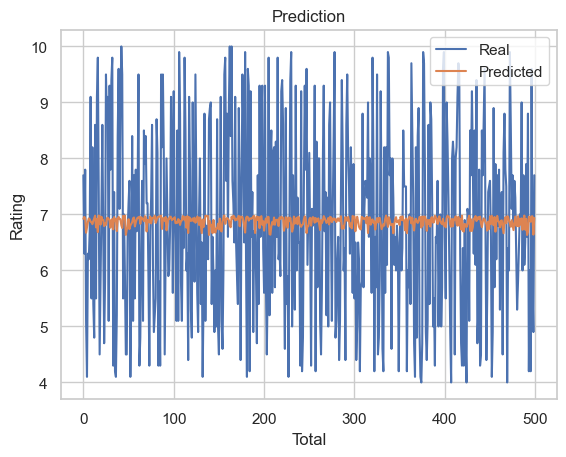

In [433]:
plt.xlabel('Total')
plt.ylabel('Rating')
plt.title('Prediction')

plt.plot(x_range,y_train)
plt.plot(x_range,y_pred_training)

# Function add a legend  
plt.legend(["Real", "Predicted"])

# Checking the training accuracy
![](https://media0.giphy.com/media/SsNUg1jqFM6oFSTmlA/giphy.gif)

In [434]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [435]:
y_test

249    4.2
353    4.8
537    6.9
424    5.0
564    9.0
      ... 
825    6.6
426    8.9
532    8.2
991    6.0
481    6.2
Name: Rating, Length: 500, dtype: float64

In [436]:
y_pred_training.shape

(500,)

In [437]:
# Calculating Mean square error of training data
mean_squared_error(y_test,y_pred_training)

3.09565580243089

In [438]:
mse_training = mean_squared_error(y_test,y_pred_training)

In [439]:
mse_training

3.09565580243089

In [440]:
# Calculating R square value of training data
r2_score(y_test,y_pred_training)

-0.01274027675003997

In [441]:
rsq_training = r2_score(y_test,y_pred_training)

In [443]:
print('mean squared error of training :',mse_training)
print('r square of training :',rsq_training)

mean squared error of training : 3.09565580243089
r square of training : -0.01274027675003997


#### Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. In our case, the value of mean squared error of testing data is 3.09565580243089 which means that there are errors in our model. Smaller the value, better it is.

#### R square represents that how well the regression model explains the observed data. In our case, R sqaure value is negtive, i.e. -0.01274027675003997. This means that the accuracy of training model is -1.27%, which means that the model is not a good fit for predicting the Rating and we should reconsider and develop a new model.

# Checking the testing accuracy
![](https://th.bing.com/th/id/R.58b456ccb42d4575c1406ecd26306bff?rik=VkaDi96dLq66SQ&pid=ImgRaw&r=0)

In [452]:
# Calculating Mean square error of testing data
mean_squared_error(y_test,y_pred_testing)

3.0958751805772473

In [453]:
mse_testing = mean_squared_error(y_test,y_pred_testing)

In [454]:
mse_testing

3.0958751805772473

In [455]:
# Calculating R square value of testing data
r2_score(y_test,y_pred_testing)

-0.012812046061240645

In [456]:
rsq_testing = r2_score(y_test,y_pred_testing)

In [457]:
print('mean squared error of testing :',mse_testing)
print('r square of testing :',rsq_testing)

mean squared error of testing : 3.0958751805772473
r square of testing : -0.012812046061240645


#### Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. In our case, the value of mean squared error of testing data is 3.0958751805772473, which means that there are errors in our model. Smaller the value, better it is.

#### R square represents that how well the regression model explains the observed data. In our case, R sqaure value is negtive, i.e. -0.012812046061240645. This states that this model has an accuracy of -1.28%, which means that the model is not a good fit for predicting the Rating and we should reconsider and develop a new model.

In [304]:
# Intecept and coeff of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 6.985475944751137
Coefficient of the line: [-0.00033831]


# Plotting the line

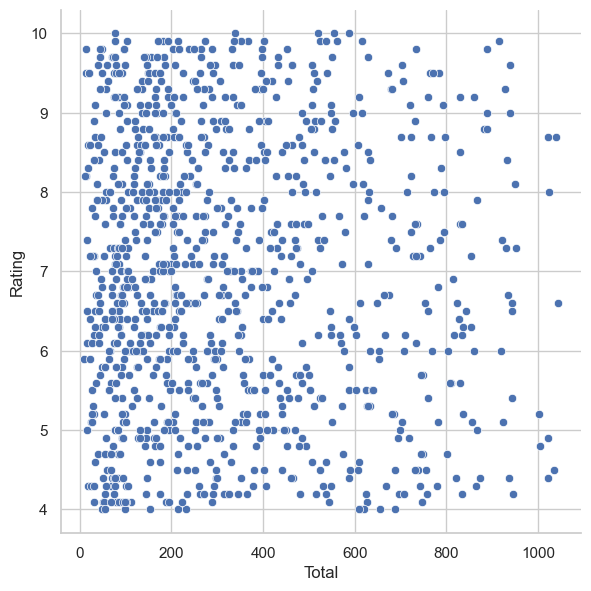

In [458]:
sns.pairplot(df,x_vars=['Total'],y_vars=['Rating'],height=6,kind='scatter')

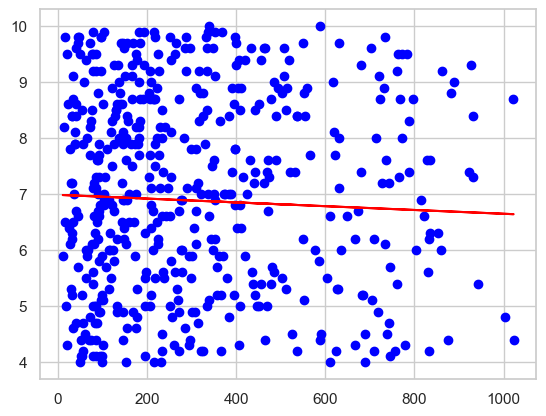

In [459]:
plt.scatter(x_test,y_test, color = 'blue')
plt.plot(x_test,y_pred, color = 'red')

# Python function created for prediction
![](https://th.bing.com/th/id/R.b8782537efc4cbd3f3f29e11091f05a0?rik=Ax2xlLFFmycdFg&pid=ImgRaw&r=0)

In [460]:
def prediction(x):
    temp=[]
    temp.append(lr.predict([[x]]))
    return temp

In [461]:
prediction(234)

[array([6.90631143])]

# ---------------------------------------------------------------------------------------------------------------

#                                                    THE END